In [41]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
#matplotlib.use('agg')

In [42]:
Titulos = ['Oceano Global']
Titulos_short = ['GO']

## Funciones

In [43]:
def FiguraSerieTemporal(sst,Ylabel,Xlabel,TituloFigura,FileOut,Ymin,Ymax):
## Serie temporal anotada con valores maximos y minimos

    dTText = .12
    
    sst_rolling = sst.rolling(time = 360 , center = True).mean()
    
    fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
    ax.plot(sst.time , sst,'c' , label = 'Diario')
    #ax.plot(sstm.time,sstm,'g',label='mensual',linewidth='3')
    ax.plot(sst_rolling.time,sst_rolling,'r', label='Suavizado (1 año)' , linewidth = '3')


    ax.plot(sst.time.isel(sst.argmax(...)) ,
            sst.isel(sst.argmax(...)),'rs' , markersize = 12 , markeredgecolor='k')
    ax.plot(sst.time.isel(sst.argmin(...)) ,
            sst.isel(sst.argmin(...)),'bs' , markersize = 12 , markeredgecolor='k')

    #Texto del maximo
    ax.text(sst.time.isel(sst.argmax(...)).values ,
            sst.isel(sst.argmax(...)) + dTText , 
            sst.time.isel(sst.argmax(...)).dt.strftime("%d %B %Y").values + 
                '\n' + "%2.3f ºC"%(sst.isel(sstd.argmax(...)).values) ,
            horizontalalignment = 'center' , verticalalignment = 'top' ,
            bbox=dict(facecolor = 'white' , alpha=0.5))

    #Texto del minimo
    ax.text(sst.time.isel(sstd.argmin(...)),
            sst.isel(sstd.argmin(...)) - dTText , 
            sst.time.isel(sst.argmin(...)).dt.strftime("%d %B %Y").values + 
                '\n' + "%2.3f ºC"%(sst.isel(sstd.argmin(...)).values) ,
            horizontalalignment = 'center', verticalalignment = 'top' ,
            bbox=dict(facecolor = 'white', alpha = 0.5))
    ax.grid()
    ax.legend(loc = 4)
    ax.set_ylabel(Ylabel)
    ax.set_xlabel(Xlabel)
    ax.set_title(TituloFigura + '\n' +
             'Max: ' + "%2.3f ºC"%(sst.isel(sst.argmax(...)).values) +
                 ' (' + sst.time.isel(sst.argmax(...)).dt.strftime("%d %B %Y").values + ')' +
                 ' - ' +
              'Min: ' + "%2.3f ºC"%(sst.isel(sst.argmin(...)).values) +
                 ' (' + sst.time.isel(sst.argmin(...)).dt.strftime("%d %B %Y").values + ')' + 
                 '\n' +
              "[" + sstd.time[0].dt.strftime("%d %B %Y").values + "-"+ sstd.time[-1].dt.strftime("%d %B %Y").values + "]");
    ax.set_ylim(Ymin,Ymax)
    plt.savefig(FileOut)
    
#----def FiguraSerieTemporal

In [44]:
def FiguraSerieTemporal_anual(sst,Xlabel,Ylabel,TituloFigura,FileOut):
# Serie temporal por años    
    df         = sst.groupby(sst.time.dt.dayofyear).mean().to_dataframe(name="mean")
    df["std"]  = sst.groupby(sst.time.dt.dayofyear).std().values

    for year, yearda in sst.groupby(sst.time.dt.year):
        df[year] = pd.Series(index=yearda["time"].dt.dayofyear,
                             data=yearda.values)
    
    df.index   = pd.date_range(start='01/Jan/2020', end='31/12/2020', freq='D')  

    currentYear = datetime.date.today().year
    indLastData = np.where(df[currentYear].isnull())[0].tolist()[0]-1

    date_form = DateFormatter("1-%b")
    
    #Figura
    fig, ax = plt.subplots(figsize=(14,8))

    ax.plot(df.index,df[currentYear],'b',linewidth='3',label=currentYear)
    for year in range(currentYear-1,currentYear-6,-1):
        ax.plot(df.index,df[year],label=year)

    ax.plot(df.index,df[1982],label='1982')

    ax.plot(df.index[indLastData],df[currentYear][indLastData],'bo', markersize=12)
    ax.plot(df.index,df["mean"],'k',linewidth='3',label='mean')
    ax.fill_between(x=df.index, y1=df["mean"]+2*df["std"], 
                            y2=df["mean"]-2*df["std"],alpha=0.5, color='#D3D3D3',
                            label='1.5*std')


    ax.set_xlim(df.index[0],df.index[365])
    ax.xaxis.set_major_formatter(date_form)

    ax.legend()
    ax.grid(linestyle=':', linewidth=.5)

    ax.set_ylabel(Ylabel)
    ax.set_xlabel(Xlabel)
    ax.set_title(TituloFigura + '\n' + 
                 "%2.3f ºC "%(sst[-1].values) + sstd.time[-1].dt.strftime("%d %B %Y").values +
                 '\n' + 
                 'Max: ' + "%2.3f ºC"%(sst.isel(sst.argmax(...)).values) +
                 ' (' + sst.time.isel(sst.argmax(...)).dt.strftime("%d %B %Y").values + ')' + '\n' +
                 '['+sstd.time[0].dt.strftime("%d %B %Y").values + "-"+ sstd.time[-1].dt.strftime("%d %B %Y").values + ']');
    plt.savefig(FileOut)
#---FiguraSerieTemporal_anual

In [45]:
Ylabel  = 'Temperatura[($^\circ$C)]'
Xlabel  = 'Fecha'

## Creo figuras

### Reading data

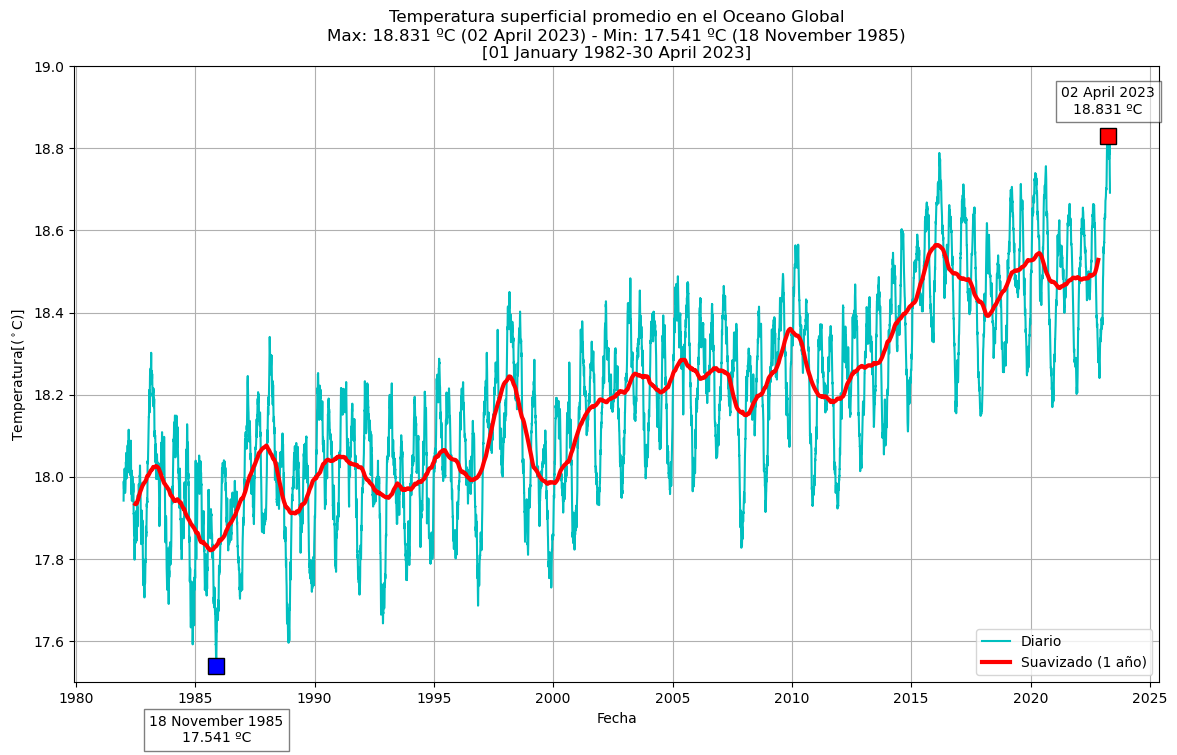

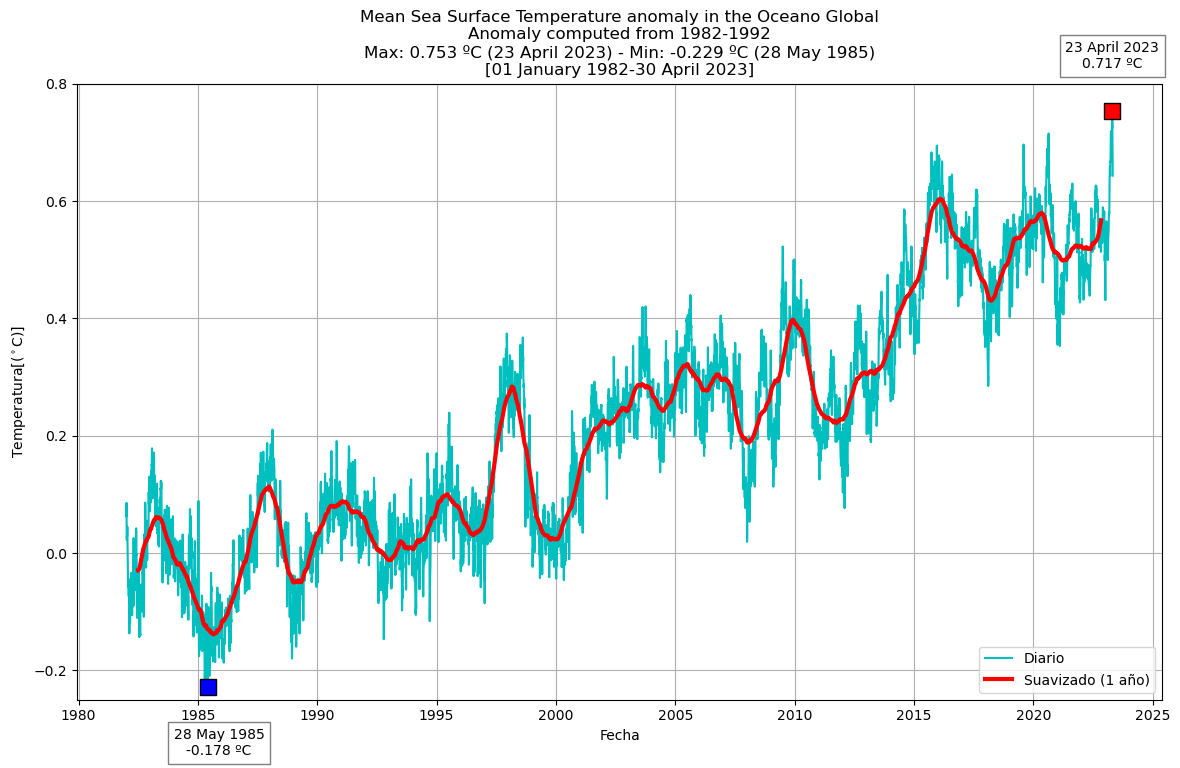

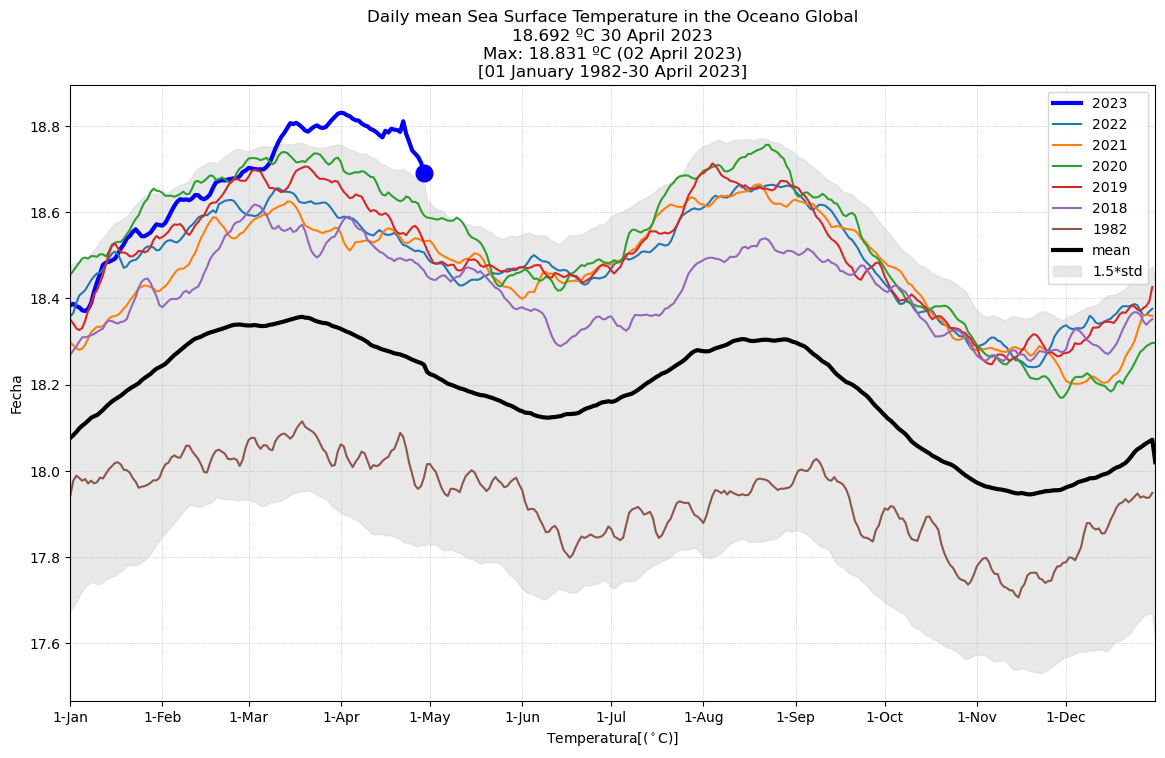

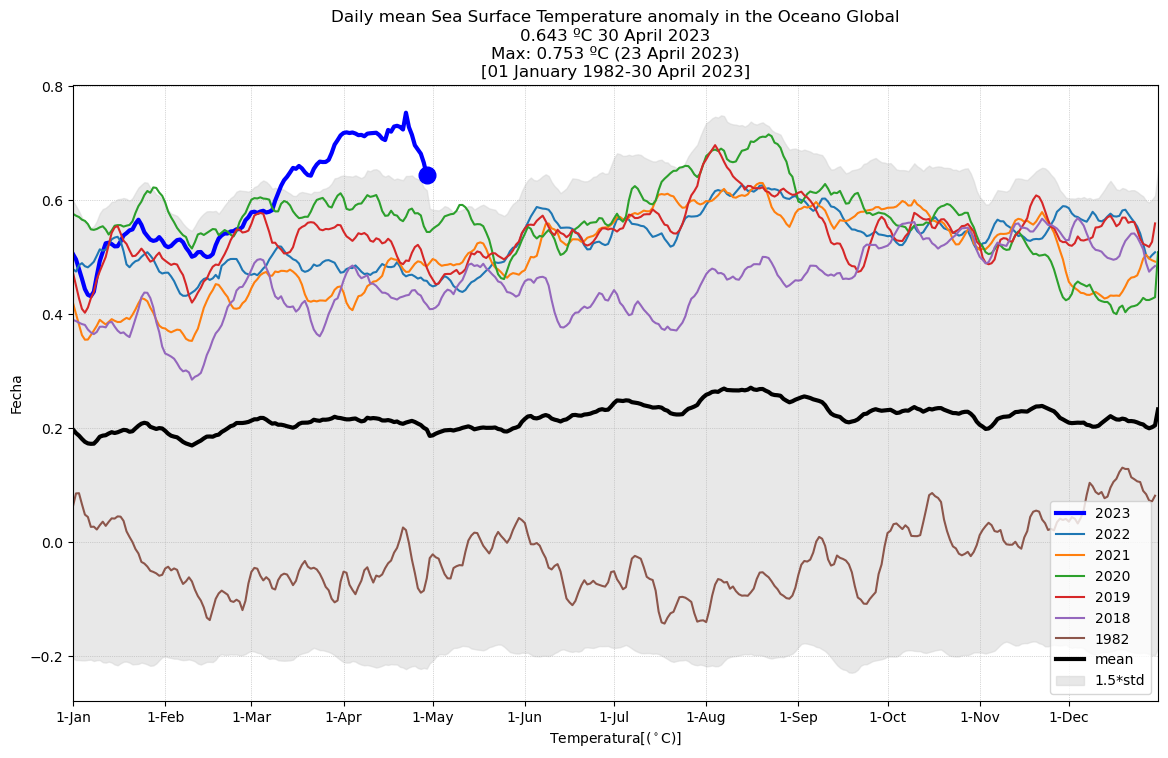

In [46]:
for i in range(0,len(Titulos)):
    
    titulo = Titulos[i]
    titulo_short = Titulos_short[i]
    
    # Daily data
    data = xr.open_dataset('./data/sstd_'+titulo_short+'mean.nc')
    sstd = data.sst
    data = xr.open_dataset('./data/sstd_anom_'+titulo_short+'mean.nc')
    sstd_anom = data.sst

    #Monthly data
    data = xr.open_dataset('./data/sstm_'+titulo_short+'mean.nc')
    sstm = data.sst
    data = xr.open_dataset('./data/sstm_anom_'+titulo_short+'mean.nc')
    sstm_anom = data.sst
    
    ## Times series mean Sea Surface Temperature
    Title1  = 'Temperatura superficial promedio en el '+ titulo
    File1 = './images/sstd_'+titulo_short+'_mean.png'
    FiguraSerieTemporal(sstd,Ylabel,Xlabel,Title1,File1,17.5,19)
    
    ## Times series mean Sea Surface Temperature anomaly 
    Title2  = 'Mean Sea Surface Temperature anomaly in the '+ titulo + '\nAnomaly computed from 1982-1992'
    File2 = './images/sstd_anom_'+titulo_short+'_mean.png'
    FiguraSerieTemporal(sstd_anom,Ylabel,Xlabel,Title2,File2,-0.25,0.8,)
    
    ## Daily times series Sea Surface Temperature
    Title3  = 'Daily mean Sea Surface Temperature in the '+ titulo
    File3 = './images/sstd_'+titulo_short+'.png'
    FiguraSerieTemporal_anual(sstd,Ylabel,Xlabel,Title3,File3)

    ## Daily times series anomly Sea Surface Temperature
    Title4  = 'Daily mean Sea Surface Temperature anomaly in the '+ titulo
    File4 = './images/sstd_anom_'+titulo_short+'.png'
    FiguraSerieTemporal_anual(sstd_anom,Ylabel,Xlabel,Title4,File4)